# Importo drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
#= %%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

=#

Installing Julia 1.10.3 on the current Colab Runtime...
2024-06-28 18:04:12 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.3-linux-x86_64.tar.gz [173495204/173495204] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
# versioninfo() #recargar pestaña para que funcione

Julia Version 1.10.3
Commit 0b4590a5507 (2024-04-30 10:59 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Instalación de paquetes a utilizar

In [2]:
# using Pkg

In [3]:
# Pkg.add("DataFrames")
# Pkg.add("DataFramesMeta")
# Pkg.add("CSV")
# Pkg.add("GR")
# Pkg.add("Plots")
# Pkg.add("Dates")
# Pkg.add("Statistics")
# Pkg.add("StatsBase")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Crayons ───────────────────── v4.1.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed SentinelArrays ────────────── v1.4.3
   Installed Tables ────────────────────── v1.11.1
   Installed InlineStrings ─────────────── v1.4.1
   Installed TableTraits ───────────────── v1.0.1
   Installed PooledArrays ──────────────── v1.4.3
   Installed PrettyTables ──────────────── v2.3.2
   Installed LaTeXStrings ──────────────── v1.3.1
   Installed DataValueInterfaces ───────── v1.0.0
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed OrderedCollections ────────── v1.6.3
   Installed Reexport ──────────────────── v1.2.2
   Installed InvertedIndices ───────────── v1.3.0
   Installed DataStructures ────────────── v0.18.20
   Installed Compat ────────────────────── v4.15.0
   Installed StringManipulation ────────── v0.3.4
   Installed SortingAlgorithms ─────────── v1.2.1
  

In [4]:
using DataFrames
using DataFramesMeta
using CSV
using Plots
using Dates
using Statistics
using GR
using StatsBase

# Procesamiento data y plots


In [5]:
movies_csv = "data_output/data_to_analyze.csv" #utilizar el path donde se tenga guardado el csv localmente

"/content/gdrive/MyDrive/tdl/tp_data.csv"

In [6]:
movies = DataFrame(CSV.read(movies_csv, DataFrame))

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
4,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
5,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
6,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
7,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
8,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
9,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing


In [7]:
unique!(movies); #filtra rows repetidas (in-place)
movies = unique(movies, :imdbId); # filtra ids repetidos (no inplace)

Identificamos que hay ratings 0.0 de peliculas con 0 votos, cosa que no tiene sentido. Los consideramos data erronea y los eliminamos.

In [8]:
filter(row -> row.votes <= 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
2,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
3,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
4,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
5,tt0105732,movie,1992,45.0,['Documentary'],0.0,0.0,missing,['Franz Leopold Schmelzer'],"['Robert Hauer-Riedl', 'Ulrike Benko']",missing,1992-01-01,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
6,tt0108280,movie,1993,missing,['Documentary'],0.0,0.0,missing,['Leopold Lummerstorfer'],missing,AT,1993-01-01,missing,['Filmlokomotive']
7,tt0111805,movie,1994,90.0,"['Drama', 'Documentary']",0.0,0.0,missing,['Tin Chun'],"['Ying Siu-Liu', 'Wai Ka-Ming', 'Poon Ting', 'Chui Bo-Lun']",missing,1993-05-08,missing,missing
8,tt0122086,movie,1987,missing,missing,0.0,0.0,missing,missing,missing,missing,1987-01-01,missing,missing
9,tt0122122,movie,1986,91.0,['Horror'],0.0,0.0,missing,['Wang Chungkuang'],"['Terry Hu', 'Shih Feng', 'Tian Ping-Chun', 'Hsiang Mei-Lung']",TW,1981-07-11,missing,missing


In [9]:
filter!(row -> row.votes > 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
4,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
5,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing
6,tt0136493,movie,1987,missing,missing,5.0,2.0,missing,missing,missing,MX,1987-01-01,missing,missing
7,tt0178572,movie,1950,missing,missing,5.0,2.0,missing,missing,missing,MX,1950-12-31,missing,missing
8,tt0201640,movie,1925,missing,missing,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,1925-01-01,missing,missing
9,tt0253295,movie,1965,missing,missing,5.0,2.0,missing,missing,missing,MX,1965-01-01,['silent cinema'],missing


In [10]:
dropmissing!(movies, [:rating]); # (! --> inplace)

In [11]:
movies[0.0 .> movies.rating .> 10.0, :] #los ratings son válidos

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?


Descartamos columna que no consideramos que pueda ser útil para la predicción

Tenemos una columna con las fechas de estreno, las transformaremos en año de estreno (las fechas missing pasarán a tener releaseYear 0)

In [12]:
movies.genres .= coalesce.(movies.genres, "['None']")
movies[!, "genres"] = split.(movies.genres) #separo generos
movies = flatten(movies, "genres") #genero una fila por cada uno
movies.genres = replace.(movies.genres, r"[\[\]']" => "")  # Eliminar corchetes y comillas
movies.genres = replace.(movies.genres, "," => "")  # Eliminar comas
rename!(movies, :genres => "genre") # renombre de genres a genre

Row,imdbId,type,year,duration,genre,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,None,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,Comedy,5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0075835,movie,1977,missing,None,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
4,tt0078803,movie,1979,missing,None,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
5,tt0104324,movie,1992,12.0,None,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing
6,tt0136493,movie,1987,missing,None,5.0,2.0,missing,missing,missing,MX,1987-01-01,missing,missing
7,tt0178572,movie,1950,missing,None,5.0,2.0,missing,missing,missing,MX,1950-12-31,missing,missing
8,tt0201640,movie,1925,missing,None,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,1925-01-01,missing,missing
9,tt0253295,movie,1965,missing,None,5.0,2.0,missing,missing,missing,MX,1965-01-01,['silent cinema'],missing


In [13]:
movies.country .= coalesce.(movies.country, "['Unknown']")
movies[!, "country"] = split.(movies.country) #separo paises
movies = flatten(movies, "country") #genero una fila por cada uno
movies.country = replace.(movies.country, r"[\[\]']" => "")  # Eliminar corchetes y comillas
movies.country = replace.(movies.country, "," => "")  # Eliminar comas
replace!(movies.country, "US" => "USA") # problema con distintas denominaciones para Estados Unidos

2947242-element Vector{String}:
 "MX"
 "Unknown"
 "MX"
 "MX"
 "AT"
 "MX"
 "MX"
 "AR"
 "MX"
 "MX"
 "MX"
 "MX"
 "MX"
 ⋮
 "SE"
 "SE"
 "BR"
 "ES"
 "TW"
 "IN"
 "GB"
 "GB"
 "GB"
 "IN"
 "ES"
 "ES"

In [15]:
table = combine(groupby(movies, [:country, :genre]), nrow => :count, :rating => mean => :mean_rating)
table = filter(row -> row.country != "Unknown" && row.genre != "None", table)
table = sort(table, :count, rev=true)

Row,country,genre,count,mean_rating
,String,String,Int64,Float64
1,USA,Drama,68590,6.58717
2,USA,Comedy,64423,6.53137
3,USA,Short,62932,6.7856
4,USA,Documentary,42329,7.06306
5,USA,Action,20540,6.3166
6,USA,Horror,19933,5.51586
7,IN,Drama,18112,6.74579
8,USA,Animation,17570,6.66148
9,USA,Crime,16854,6.48394


In [16]:
top_10_countries = combine(groupby(table, :country), :count => sum => :total_count)
top_10_countries = sort(top_10_countries, :total_count, rev=true)
top_10_countries = first(top_10_countries, 10)

show(top_10_countries)

10×2 DataFrame
 Row │ country  total_count 
     │ String   Int64       
─────┼──────────────────────
   1 │ USA           466103
   2 │ IN             54972
   3 │ FR             54568
   4 │ UK             50198
   5 │ GB             49879
   6 │ JP             47756
   7 │ CA             45816
   8 │ DE             37550
   9 │ IT             27939
  10 │ ES             25089

In [17]:
table_top10 = filter(row -> row.country in top_10_countries.country, table)

Row,country,genre,count,mean_rating
,String,String,Int64,Float64
1,USA,Drama,68590,6.58717
2,USA,Comedy,64423,6.53137
3,USA,Short,62932,6.7856
4,USA,Documentary,42329,7.06306
5,USA,Action,20540,6.3166
6,USA,Horror,19933,5.51586
7,IN,Drama,18112,6.74579
8,USA,Animation,17570,6.66148
9,USA,Crime,16854,6.48394


In [18]:
pivoted_table = unstack(table_top10, :country, :genre, :mean_rating, fill=0)

Row,country,Drama,Comedy,Short,Documentary,Action,Horror,Animation,Crime,Romance,Adventure,Thriller,Family,Adult,Music,Sci-Fi,Mystery,Fantasy,Reality-TV,Biography,Sport,History,Western,Musical,Talk-Show,War,News,Game-Show,Film-Noir,TV,Movie,Science,Fiction
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,USA,6.58717,6.53137,6.7856,7.06306,6.3166,5.51586,6.66148,6.48394,6.32947,6.59595,5.70544,6.56705,6.36437,7.07066,6.08557,6.32812,6.46377,6.97672,7.12524,6.92261,7.224,6.09905,6.62695,7.00661,6.54442,6.43487,7.34069,6.46005,6.65455,6.65455,6.28,6.28
2,IN,6.74579,6.45013,8.11814,7.951,5.98827,5.97398,7.16262,6.48698,6.45946,6.53597,6.50533,6.89102,6.67,7.20652,7.00723,6.7922,6.77869,6.91969,7.65045,6.99909,7.52376,6.05,6.65839,7.50462,6.91724,7.62,6.7,0.0,8.6,8.6,5.56667,5.56667
3,FR,6.33194,6.04699,6.24716,6.85596,6.37976,5.96578,6.81625,6.29325,6.25386,6.49992,6.17546,6.81683,5.55704,6.9462,6.3958,6.42961,6.32731,6.42131,6.88303,6.69535,6.92112,5.66909,6.38113,6.05,6.75343,6.77368,6.59057,7.0,6.40962,6.40962,6.18333,6.18333
4,UK,6.87615,6.82221,6.74433,7.08802,6.64596,6.23055,6.84276,6.5614,6.57829,6.68335,6.50129,7.08829,6.79,7.46765,6.59587,6.63378,6.95694,6.62484,7.14211,7.11369,7.33131,7.01818,6.85543,6.36143,6.89129,5.97195,6.58264,6.23333,6.8,6.8,6.05,6.05
5,JP,6.43144,6.66428,6.23685,7.01736,6.95676,5.5768,6.93507,6.31941,6.32483,7.26478,6.00945,6.81055,6.18047,7.01717,6.30193,6.32066,6.50889,7.35435,6.85731,6.94447,6.74659,6.44,6.43727,7.25652,6.56052,6.96667,7.70435,7.8,5.7,5.7,5.8875,5.8875
6,GB,6.85612,6.90856,7.08003,7.33776,6.15534,5.36336,6.97146,6.70572,6.62784,6.67267,6.01524,6.8662,7.52963,7.42669,6.18752,6.64088,6.49001,7.42361,7.13997,7.13103,7.40205,6.02222,6.60914,7.52703,6.73855,7.45278,7.69509,6.51892,6.92222,6.92222,6.4,6.4
7,DE,6.32429,6.12653,6.61778,7.08459,5.72413,5.42773,6.52227,6.39887,5.82562,5.91817,5.87087,6.07979,6.28862,7.08221,6.15884,6.19735,6.24798,5.29415,6.84332,6.69847,6.87264,5.81731,6.77378,5.75714,6.79333,6.3973,5.50409,6.6,5.96667,5.96667,6.56,6.56
8,CA,6.57233,6.48599,6.83531,7.1391,5.88378,5.70197,6.70914,6.35473,6.32857,6.44728,5.51679,6.74173,6.55884,6.91917,5.98971,6.16829,6.46548,7.15772,6.96814,6.73642,7.17198,6.25244,6.69024,6.31739,6.74308,6.85725,7.02857,0.0,6.08,6.08,5.9,5.9
9,IT,6.35708,5.9737,6.87094,6.99108,5.61288,5.47006,6.94758,6.24864,6.12376,5.59114,5.80324,6.33669,5.73322,7.11247,5.73257,6.08529,6.12337,6.07077,6.9154,6.60364,6.60124,5.53341,5.99711,6.23438,6.19072,6.84815,6.38448,6.2,6.66667,6.66667,6.4,6.4


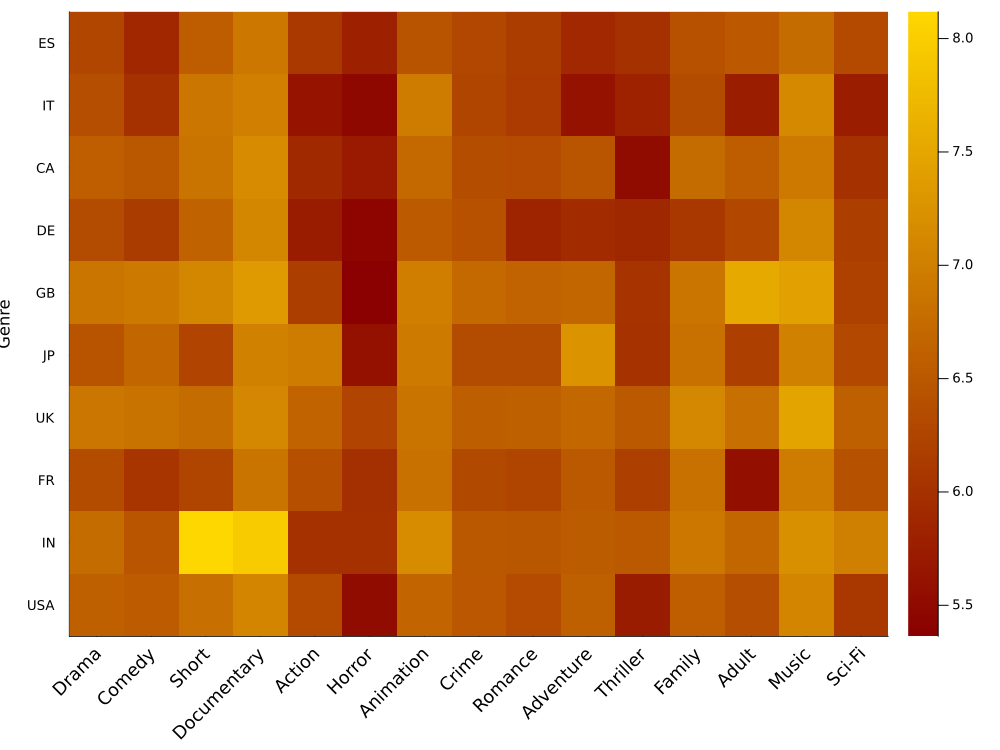

In [25]:
# Seleccionaamos sólo 15 géneros para mostrar
generos_a_mostrar = names(pivoted_table)[2:16]

paleta_colores = cgrad([:darkred, :gold])

Plots.heatmap(generos_a_mostrar, pivoted_table.country, Matrix(pivoted_table[:, 2:16]), xlabel="Country", ylabel="Genre", color=paleta_colores, size=(1000, 750), xtickfont=font(12), xrotation=45, ytickfont=font(9))